## Hierarchical and K-means Clustering


Clustering, an unsupervised technique in machine learning (ML), helps identify customers based on their key characteristics. 

In this assignment, we will discuss the two clustering techniques – K-Means clustering and hierarchical clustering. 

We will see the result of clustering when we implement these techniques in Python. Finally, we will discuss the comparison between these two clustering techniques – K-Means and Hierarchical clustering & find the best K-value using Silhoutte scores and Inertia

In [ ]:
#Load all required general libraries
import pandas as pd
import numpy as np
from matplotlib import style
from matplotlib import pyplot as plt
#import graphviz as gr
%matplotlib inline
style.use("fivethirtyeight")
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", 60)
pd.set_option('display.max_rows', 50)
pd.set_option('display.width', 1000)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Load the dataset
data =pd.read_csv("/content/drive/MyDrive/TopUniversities.csv")
data.info()
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   University       25 non-null     object 
 1   AvgSAT           25 non-null     float64
 2   PctTop10Student  25 non-null     int64  
 3   PctAccept        25 non-null     int64  
 4   StuFacRatio      25 non-null     int64  
 5   Expenses         25 non-null     float64
 6   GradRate         25 non-null     int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 1.5+ KB


,University,AvgSAT,PctTop10Student,PctAccept,StuFacRatio,Expenses,GradRate
0,Harvard,14.00,91,14,11,39.525,97
1,Princeton,13.75,91,14,8,30.220,95
2,Yale,13.75,95,19,11,43.514,96
3,Stanford,13.60,90,20,12,36.450,93
4,MIT,13.80,94,30,10,34.870,91
5,Duke,13.15,90,30,12,31.585,95
6,CalTech,14.15,100,25,6,63.575,81
7,Dartmouth,13.40,89,23,10,32.162,95
8,Brown,13.10,89,22,13,22.704,94
9,JohnsHopkins,13.05,75,44,7,58.691,87


We see that the column University is of type Object. We also see from the data snippet above that University names are unique and we don't have to consider in our analysis.

But, for purpose of learning, we will use the categories function to convert categorical variable to numerical data type


In [ ]:
labels = data['University'].astype('category').cat.categories.tolist()
cat_university = {'University' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
print(cat_university)

{'University': {'Brown': 1, 'CalTech': 2, 'CarnegieMellon': 3, 'Columbia': 4, 'Cornell': 5, 'Dartmouth': 6, 'Duke': 7, 'Georgetown': 8, 'Harvard': 9, 'JohnsHopkins': 10, 'MIT': 11, 'Northwestern': 12, 'NotreDame': 13, 'PennState': 14, 'Princeton': 15, 'Purdue': 16, 'Stanford': 17, 'TexasA&M': 18, 'UCBerkeley': 19, 'UChicago': 20, 'UMichigan': 21, 'UPenn': 22, 'UVir': 23, 'UWisconsin': 24, 'Yale': 25}}


We then add the converted field to our data and store it in a new dataset called data_new

In [ ]:
data_new = data.copy()
data_new.replace(cat_university, inplace=True)

data_new

,University,AvgSAT,PctTop10Student,PctAccept,StuFacRatio,Expenses,GradRate
0,9,14.00,91,14,11,39.525,97
1,15,13.75,91,14,8,30.220,95
2,25,13.75,95,19,11,43.514,96
3,17,13.60,90,20,12,36.450,93
4,11,13.80,94,30,10,34.870,91
5,7,13.15,90,30,12,31.585,95
6,2,14.15,100,25,6,63.575,81
7,6,13.40,89,23,10,32.162,95
8,1,13.10,89,22,13,22.704,94
9,10,13.05,75,44,7,58.691,87


All variables are converted to numerical type. We can now move on to performing the clustering

Before we use the python library for hierarchical and k-means clustering, we will plot a heatmap that can visually represent the clustering using the clustermap from seaborn library. 

Clustermap does hierarchical clustering on the complete data and shows how the variables will impact clustering.

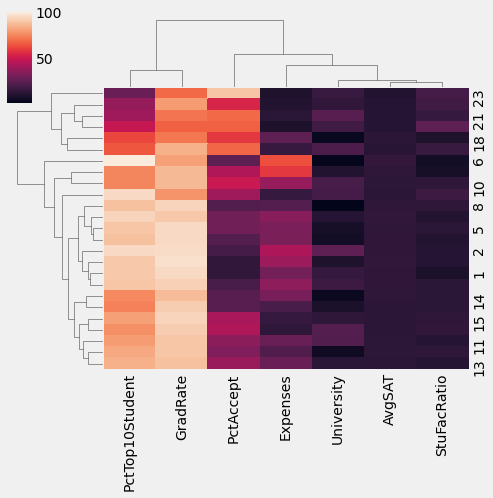

In [ ]:
# Importing the library
import seaborn as sns

# Clustering data row-wise and
# changing color of the map.
sns.clustermap(data_new, figsize=(7, 7)) #this does hierarchical clustering easily


Variation in the intensity of color depicts how data is clustered or varies over space. 

From the above plot we can say, the GradRate and PctTop10Student are grouped better than other variables

##A. Dendrogram to Visualize clusters by the distance

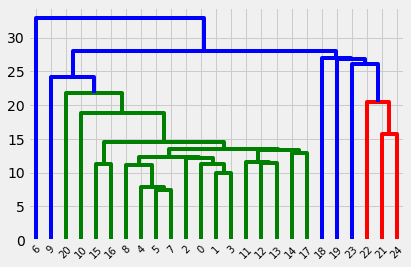

In [ ]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(data_new, method='single'))

We can see that there are many clusters possible with our data

We then perform Agglomerative clustering using the functions in sklearn library

In [ ]:
# Single linkage hierarchical (agglomerative) clustering
from sklearn.cluster import AgglomerativeClustering
agg = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='single') 
pred_hierarch = agg.fit_predict(data_new)
hier_Cluster = pred_hierarch #Store the cluster values

In [ ]:
#K-means Clustering
from sklearn.cluster import KMeans
kmean= KMeans(n_clusters=5,random_state= 101)
pred_kmean = kmean.fit_predict(data_new)
meansCluster = pred_kmean #store cluster values 


In [ ]:
#Combining the two cluster values to compare 
cluster_data = pd.DataFrame( {'Cluster_hierarchy': hier_Cluster,'Cluster_kmeans': meansCluster})
cluster_data

,Cluster_hierarchy,Cluster_kmeans
0,2,2
1,2,2
2,2,2
3,2,2
4,2,2
5,2,2
6,3,4
7,2,2
8,2,2
9,2,4


We see from the above table that hierarchical and K-means clustering show similar cluster values, except for a few that are being grouped using K-means. If we do not set a random state, k-means will change the clustering each time we run the code, but hierarchical clustering will remain constant. 

## C. Finding best K value using Silhoutte score and Inertia score

In [ ]:
#For Hierarchical Clusters
# Find the best number of clusters (k) based on silhouette score
from sklearn.metrics import silhouette_score
agg_per_k = [AgglomerativeClustering(n_clusters=k, linkage='single').fit(data_new)
             for k in range(1, 15)]
silhouette_scores = [silhouette_score(data_new, model.labels_)
for model in agg_per_k[1:]]
silhouette_scores

[0.20175224297585245,
 0.38350625544005623,
 0.25172873391167333,
 0.23709125565091085,
 0.23882960485181776,
 0.24334586574196113,
 0.1563307929995096,
 0.14210049421636606,
 0.14909081701021448,
 0.12709992162577013,
 0.17135214848212266,
 0.15471603869014613,
 0.1406787053349263]

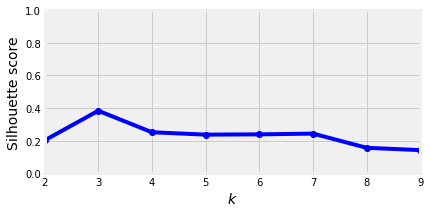

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 3))
plt.plot(range(2, 15), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([2, 9, 0, 1])
plt.show()

We can see from the graph that the highest silhoutte score is when k= 3. Using a score higher than 3 will not give effective accuracy

In [ ]:
#For K-means clustering
from sklearn.metrics import silhouette_score
kmeans_per_k = [KMeans(n_clusters=k, random_state=1).fit(data_new)
                for k in range(1, 15)]
silhouette_scores = [silhouette_score(data_new, model.labels_)
                     for model in kmeans_per_k[1:]]
silhouette_scores

[0.5379626271313814,
 0.2871647957037908,
 0.3141401245337911,
 0.2507865864698898,
 0.23383710276597763,
 0.24445810974860827,
 0.22495423201718537,
 0.21628841079486633,
 0.19524630741006002,
 0.1802498840410546,
 0.1891070751603453,
 0.18954320543318087,
 0.1897252194223729]

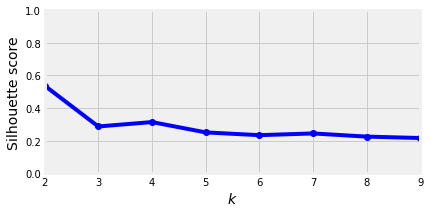

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 3))
plt.plot(range(2, 15), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([2, 9, 0, 1])
plt.show()

Using K-means clustering, the highest silhoutte score is with k= 2 which is different from hierarchical clustering. 

In [ ]:
# Find the best k based on inertia (SSE) score
inertias = [model.inertia_ for model in kmeans_per_k]
inertias

[27092.35452,
 10699.233735578948,
 8018.1335549545465,
 6351.463647515152,
 5246.060708527778,
 4246.222547633333,
 3800.140217277778,
 2843.7542262666666,
 2493.848878145238,
 2125.657744383333,
 1801.892616416667,
 1547.1256366333334,
 1190.4164295,
 961.3070086666667]

Text(0.5, 1.0, 'Different Inertia Values for Different Number of Clusters')

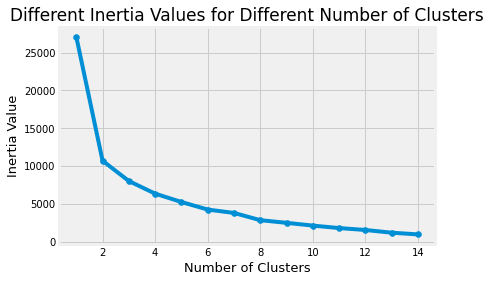

In [ ]:
plt.plot(range(1,15),inertias)
plt.scatter(range(1,15),inertias)
plt.xlabel("Number of Clusters", size=13)
plt.ylabel("Inertia Value", size=13)
plt.title("Different Inertia Values for Different Number of Clusters", size=17)

The above elbow graph shows that only performing clustering for K=2 is valid and for K>2 the inertia is decreasing so it is not useful to choose a higher K-value. Moreover, using the labels and predicting the values using our dataset and finding the precision and accuracy values can help us find the best method.

In [ ]:
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic

In [ ]:
!jupyter nbconvert --to pdf "/content/drive/MyDrive/Colab Notebooks/Assignment_6.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Assignment_6.ipynb to pdf
[NbConvertApp] Support files will be in Assignment_6_files/
[NbConvertApp] Making directory ./Assignment_6_files
[NbConvertApp] Making directory ./Assignment_6_files
[NbConvertApp] Making directory ./Assignment_6_files
[NbConvertApp] Making directory ./Assignment_6_files
[NbConvertApp] Making directory ./Assignment_6_files
[NbConvertApp] Writing 70765 bytes to ./notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', './notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', './notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 131909 bytes to /content/drive/MyDrive/Colab Notebooks/Assignment_6.pdf
